In [18]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
import matplotlib.cm as cm
from scipy.stats import norm
import statistics

#from census import Census

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
path = "CSV statistics/TE_2020.csv"
te2020 = pd.read_csv(path)
te2020['YDS'] = te2020['YDS'].str.replace(',', '').astype(float)
te2020.describe()

,Rank,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,134.500000,9.130597,13.526119,98.246269,4.535448,11.652985,0.0,0.858209,0.108209,0.339552,0.018657,0.085821,6.305970,19.506716,1.479478
std,77.509139,17.751766,26.221244,199.767747,5.962948,16.218167,0.0,1.856875,0.567081,2.470880,0.160835,0.329715,6.702035,38.978165,2.769130
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,134.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,0.000000
75%,201.250000,9.250000,15.000000,99.750000,9.900000,23.250000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,19.600000,1.900000
max,268.000000,107.000000,145.000000,1416.000000,44.000000,70.000000,0.0,11.000000,6.000000,26.000000,2.000000,2.000000,16.000000,260.300000,17.400000


In [20]:
mask = te2020.REC >= 25
te2020 = te2020[mask]
te2020.dropna().reset_index(drop=True)
te2020.describe()

,Rank,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,21.000000,46.153846,68.435897,501.717949,10.707692,37.410256,0.0,4.128205,0.512821,1.512821,0.128205,0.410256,14.589744,98.612821,6.823077
std,12.861612,19.256630,28.248703,246.297098,1.664551,12.117230,0.0,2.848633,1.166908,5.015092,0.409074,0.594623,1.942840,46.740421,3.129861
min,1.000000,25.000000,29.000000,208.000000,8.000000,19.000000,0.0,0.000000,0.000000,-3.000000,0.000000,0.000000,8.000000,40.200000,2.700000
25%,10.500000,31.000000,46.000000,342.000000,9.350000,26.500000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,62.150000,4.300000
50%,20.000000,41.000000,62.000000,448.000000,10.200000,38.000000,0.0,4.000000,0.000000,0.000000,0.000000,0.000000,15.000000,93.400000,7.000000
75%,30.500000,56.000000,88.000000,619.000000,11.850000,45.000000,0.0,6.000000,0.500000,0.000000,0.000000,1.000000,16.000000,119.150000,8.100000
max,47.000000,107.000000,145.000000,1416.000000,14.100000,70.000000,0.0,11.000000,6.000000,26.000000,2.000000,2.000000,16.000000,260.300000,17.400000


In [21]:
inputs = ['TGT',]
feature = te2020[inputs]
target = te2020['YDS']

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    YDS   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     171.2
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           1.89e-15
Time:                        21:48:14   Log-Likelihood:                -235.90
No. Observations:                  39   AIC:                             475.8
Df Residuals:                      37   BIC:                             479.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.3464     44.657     -0.881      0.384    -129.830      51.137
TGT            7.9061      0.604     13.083      0.000       6.682       9.131
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.215
Skew:                           0.529   Prob(JB):                        0.330
Kurtosis:                       3.493   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-22-5e4635ddc653>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Travis Kelce (KC)
Darren Waller (LV)
Robert Tonyan (GB)
T.J. Hockenson (DET)
Mark Andrews (BAL)
Logan Thomas (WAS)
Mike Gesicki (MIA)
Rob Gronkowski (TB)
Hayden Hurst (ATL)
Jonnu Smith (NE)
Jimmy Graham (CHI)
Noah Fant (DEN)
Hunter Henry (NE)
Dalton Schultz (DAL)
Eric Ebron (PIT)
Evan Engram (NYG)
Jared Cook (LAC)
Tyler Higbee (LAR)
George Kittle (SF)
Dallas Goedert (PHI)
Austin Hooper (CLE)
Irv Smith Jr. (MIN)
Dan Arnold (CAR)
Gerald Everett (SEA)
Trey Burton (FA)
Player #25 was not added
Jordan Akins (HOU)
Mo Alie-Cox (IND)
Tyler Eifert (FA)
Anthony Firkser (TEN)
Jordan Reed (FA)
Zach Ertz (PHI)
Drew Sample (CIN)
Player #33 was not added
Chris Herndon IV (NYJ)
Player #35 was not added
Cameron Brate (TB)
Jacob Hollister (BUF)
Player #38 was not added


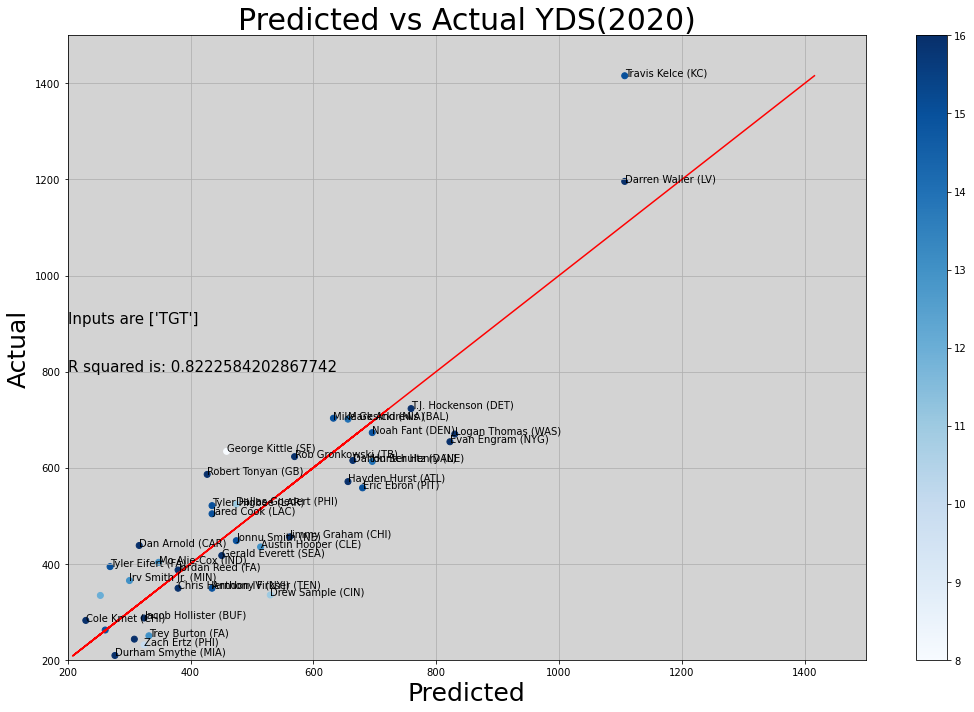

In [22]:
plt.figure(figsize=(15,10))
weight = te2020.G
plt.scatter(results.fittedvalues, te2020.YDS,marker="o",c= weight,cmap='Blues')

plt.xlim(200,1500)
plt.ylim(200,1500)
plt.xlabel("Predicted",fontsize=25)
plt.ylabel("Actual",fontsize=25)
plt.title("Predicted vs Actual YDS(2020)",fontsize=30)
plt.plot(te2020.YDS, te2020.YDS,color='red')
plt.tight_layout()
plt.annotate(f'R squared is: {results.rsquared}',(200,800),fontsize=15)
plt.annotate(f'Inputs are {inputs}',(200,900),fontsize=15)

plt.grid()
plt.colorbar()
ax = plt.axes()
ax.set(facecolor='lightgray')

n = te2020.Player

for i,txt in enumerate(n):
    try:
        print(te2020.Player[i])
        plt.annotate(txt, (results.fittedvalues[i], te2020.YDS[i]))
    except:
        print(f'Player #{i} was not added')

plt.tight_layout()
plt.show()

In [17]:
predicted = results.fittedvalues
actual = te2020.YDS
name = te2020.Player
games = te2020.G
difference  = te2020.YDS - results.fittedvalues
teDict = {'Name':name,'Games':games,'Predicted':predicted,'Actual':actual,'Difference':difference}
predDf = pd.DataFrame(teDict)
pd.set_option('max_rows', None)

predDf.sort_values('Difference',ascending=False)

,Name,Games,Predicted,Actual,Difference
0,Travis Kelce (KC),15.0,1107.045091,1416.0,308.954909
18,George Kittle (SF),8.0,458.740938,634.0,175.259062
2,Robert Tonyan (GB),16.0,427.116345,586.0,158.883655
27,Mo Alie-Cox (IND),15.0,268.993381,394.0,125.006619
22,Dan Arnold (CAR),16.0,316.430270,438.0,121.569730
1,Darren Waller (LV),16.0,1107.045091,1196.0,88.954909
17,Tyler Higbee (LAR),15.0,435.022493,521.0,85.977507
39,Kyle Rudolph (NYG),12.0,253.181084,334.0,80.818916
6,Mike Gesicki (MIA),15.0,632.676199,703.0,70.323801
16,Jared Cook (LAC),15.0,435.022493,504.0,68.977507
